In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skmetrics
import sklearn.model_selection as skmodel
from sklearn import linear_model

nbaDf = pd.read_csv('nbaRookies.csv')

print(nbaDf)

                       Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  \
0            Brandon Ingram  36  27.4   7.4  2.6   7.6  34.7      0.5  2.1   
1           Andrew Harrison  35  26.9   7.2  2.0   6.7  29.6      0.7  2.8   
2            JaKarr Sampson  74  15.3   5.2  2.0   4.7  42.2      0.4  1.7   
3               Malik Sealy  58  11.6   5.7  2.3   5.5  42.6      0.1  0.5   
4               Matt Geiger  48  11.5   4.5  1.6   3.0  52.4      0.0  0.1   
5              Tony Bennett  75  11.4   3.7  1.5   3.5  42.3      0.3  1.1   
6               Don MacLean  62  10.9   6.6  2.5   5.8  43.5      0.0  0.1   
7              Tracy Murray  48  10.3   5.7  2.3   5.4  41.5      0.4  1.5   
8              Duane Cooper  65   9.9   2.4  1.0   2.4  39.2      0.1  0.5   
9              Dave Johnson  42   8.5   3.7  1.4   3.5  38.3      0.1  0.3   
10           Corey Williams  35   6.9   2.3  0.9   2.4  36.5      0.0  0.1   
11                 Sam Mack  40   6.7   3.6  1.2   3.0  39.8    

<Figure size 432x288 with 0 Axes>

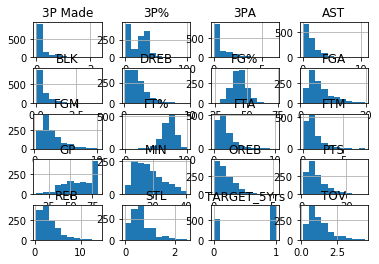

In [16]:
plt.figure()
nbaDf.hist()
plt.show()

In [17]:
pd.isna(nbaDf)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
pd.isna(nbaDf).sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [19]:
nbaDf[pd.isna(nbaDf).any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [23]:
nbaDf.fillna(0, inplace=True)

In [24]:
nbaDf[pd.isna(nbaDf).any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs


In [25]:
nbaFeatDf = nbaDf.drop(['Name', 'TARGET_5Yrs'], axis=1)
nbaLabelsDf = nbaDf[['TARGET_5Yrs']]

In [35]:
nbaTrainFeat, nbaTestFeat, nbaTrainLabels, nbaTestLabels = skmodel.train_test_split(
    nbaFeatDf,
    nbaLabelsDf,
    test_size=0.2
)
print(nbaTrainFeat.shape)
print(nbaTestFeat.shape)
print(nbaTrainLabels.shape)
print(nbaTestLabels.shape)

(1072, 19)
(268, 19)
(1072, 1)
(268, 1)


In [36]:
nbaTrainFeat, nbaValFeat, nbaTrainLabels, nbaValLabels = skmodel.train_test_split(nbaTrainFeat,
                                                                                  nbaTrainLabels,
                                                                                  test_size=0.2)
print(nbaTrainFeat.shape)
print(nbaValFeat.shape)
print(nbaTrainLabels.shape)
print(nbaValLabels.shape)

(857, 19)
(215, 19)
(857, 1)
(215, 1)


In [47]:
logRegNba = linear_model.LogisticRegression(C=10000, max_iter=50)

logRegNba.fit(nbaTrainFeat, nbaTrainLabels)

print(logRegNba.intercept_)
print(logRegNba.coef_)

[-5.30140945]
[[ 3.92045121e-02 -5.95332031e-02 -7.90525078e-01  6.31079555e-01
   5.11704598e-01  4.20521958e-02  5.90183015e+00 -1.80786801e+00
   4.84419403e-04  7.31880940e-01  3.37081560e-01  1.43538579e-02
   7.68562624e-01 -3.01058958e-01  1.10278572e-01  2.76902631e-01
   5.64577503e-01  9.38256900e-01 -6.65603211e-01]]


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
prediction = logRegNba.predict(nbaTestFeat)

from sklearn.metrics import f1_score, accuracy_score
print(f1_score(nbaTestLabels, prediction))
print(accuracy_score (nbaTestLabels, prediction))

0.7447447447447447
0.6828358208955224


In [41]:
lMaxIter = [2, 5, 50, 100, 250, 1000]
lF1Score = []
lAccuracyScore = []

for maxIter in lMaxIter:
    currLogRegNba = linear_model.LogisticRegression(C=1, max_iter=maxIter)
    currLogRegNba.fit(nbaTrainFeat, nbaTrainLabels)
    currPred = currLogRegNba.predict(nbaValFeat)
    lF1Score.append(f1_score(nbaValLabels, currPred))
    lAccuracyScore.append(accuracy_score(nbaValLabels, currPred))
    
print(lF1Score)
print(lAccuracyScore)

[0.7569444444444445, 0.7820069204152249, 0.7703180212014133, 0.7703180212014133, 0.7703180212014133, 0.7703180212014133]
[0.6744186046511628, 0.7069767441860465, 0.6976744186046512, 0.6976744186046512, 0.6976744186046512, 0.6976744186046512]


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(*args, **kw)>

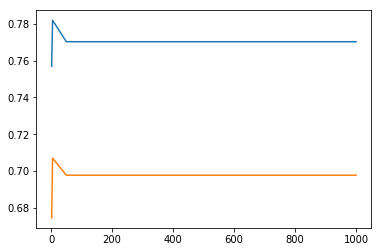

In [43]:
plt.figure()
plt.plot(lMaxIter, lF1Score)
plt.plot(lMaxIter, lAccuracyScore)
plt.show